# **LSTM Algorithm**



In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
%matplotlib inline


In [3]:
df=yf.download('LTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,5.085890,5.170770,4.965950,5.058550,5.058550,3071840
2014-09-18,5.065430,5.065430,4.579960,4.685230,4.685230,4569260
2014-09-19,4.687290,4.755820,4.254350,4.327770,4.327770,3917450
2014-09-20,4.329200,4.616080,4.202190,4.286440,4.286440,5490660
2014-09-21,4.263070,4.300130,4.154990,4.245920,4.245920,2931220
...,...,...,...,...,...,...
2022-03-26,124.071068,125.360939,122.287392,124.881332,124.881332,560151992
2022-03-27,124.889275,129.397476,123.675545,129.397476,129.397476,740569100
2022-03-28,129.400635,132.412476,127.852745,127.938614,127.938614,943699101


Text(0.5, 1.0, 'Price of Litecoin')

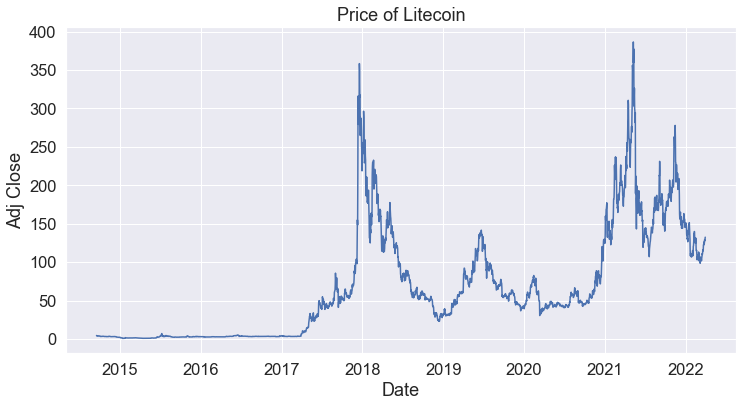

In [5]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid", font_scale=1.5)
sns.lineplot(x=df.index, y="Adj Close", data=df).set_title("Price of Litecoin")

In [6]:
#Data Preprocessing
data = df.iloc[:, 0]

In [7]:
hist = []
target = []
length = 90

for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [8]:
print(len(hist[0]))
print(len(hist))
print(len(target))

90
2662
2662


In [9]:
print(hist[0][89])
print(data[89])

3.481110095977783
3.481110095977783


In [10]:
print(hist[1][89])
print(data[90])
print(target[0])

3.4518399238586426
3.4518399238586426
3.4518399238586426


In [11]:
print(type(hist), type(target))

<class 'list'> <class 'list'>


In [12]:
#convert list to array
hist = np.array(hist)
target = np.array(target)

In [13]:
print(type(hist), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
hist.shape

(2662, 90)

In [15]:
target.shape

(2662,)

In [16]:
target = target.reshape(-1,1)
target.shape

(2662, 1)

In [17]:
#Normalize the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [18]:
#Reshape the input
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(2662, 90, 1)


In [19]:
#split the dataset
to_row=int(len(df)*0.8)
X_train = hist_scaled[:to_row,:,:]
X_test = hist_scaled[to_row:,:,:]

y_train = target_scaled[:to_row,:]
y_test = target_scaled[to_row:,:]

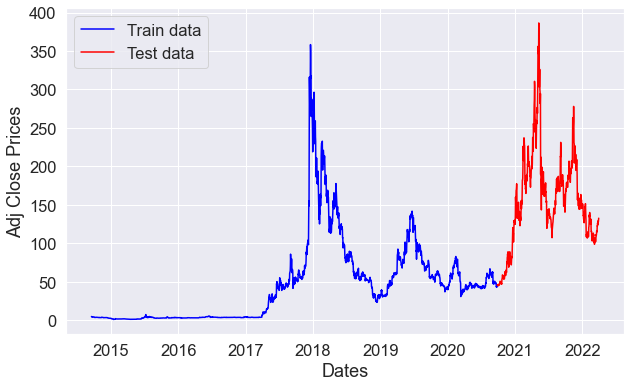

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close Prices')
plt.plot(df[0:to_row]['Adj Close'],'blue',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'red',label='Test data')
plt.legend()

In [21]:
pip install tensorflow

In [22]:
#Building the neural network
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()

model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))

model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))

model.add(layers.LSTM(units=32, dropout=0.2))

model.add(layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 90, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=30,validation_split=0.3)

Epoch 1/10
52/52 [==============================] - 53s 422ms/step - loss: 0.0049 - val_loss: 9.2990e-04
Epoch 2/10
52/52 [==============================] - 15s 281ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 3/10
52/52 [==============================] - 13s 247ms/step - loss: 0.0022 - val_loss: 5.1772e-04
Epoch 4/10
52/52 [==============================] - 13s 253ms/step - loss: 0.0019 - val_loss: 5.5801e-04
Epoch 5/10
52/52 [==============================] - 13s 258ms/step - loss: 0.0022 - val_loss: 7.0503e-04
Epoch 6/10
52/52 [==============================] - 14s 265ms/step - loss: 0.0021 - val_loss: 4.0275e-04
Epoch 7/10
52/52 [==============================] - 15s 300ms/step - loss: 0.0021 - val_loss: 4.0390e-04
Epoch 8/10
52/52 [==============================] - 15s 286ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 9/10
52/52 [==============================] - 17s 329ms/step - loss: 0.0022 - val_loss: 5.5045e-04
Epoch 10/10
52/52 [==============================] - 16s 311ms/

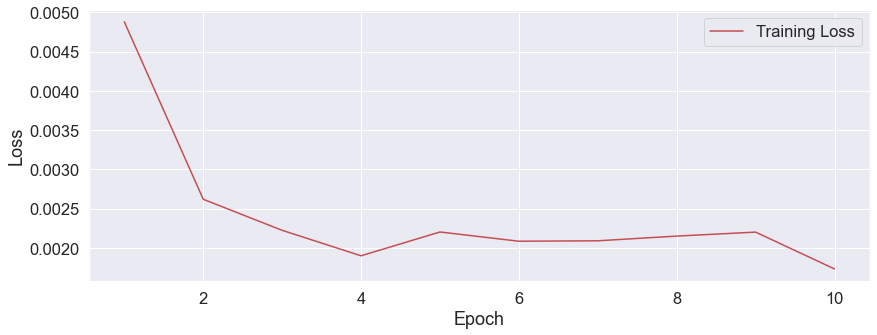

In [24]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(14,5))
plt.plot(epoch_count, loss, 'r')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

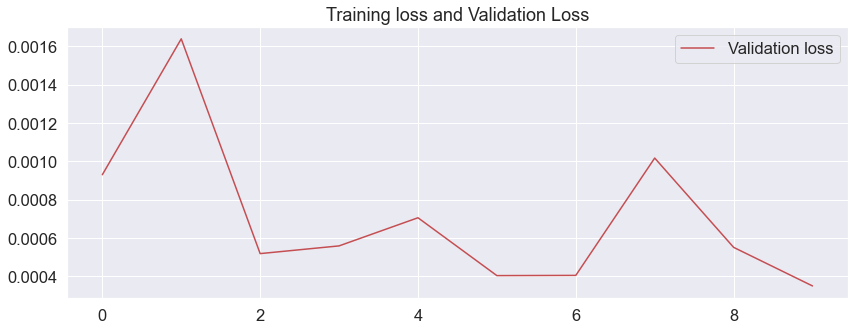

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(14,5))
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Validation Loss")
plt.legend()
plt.show()

In [26]:
pred = model.predict(X_test)
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

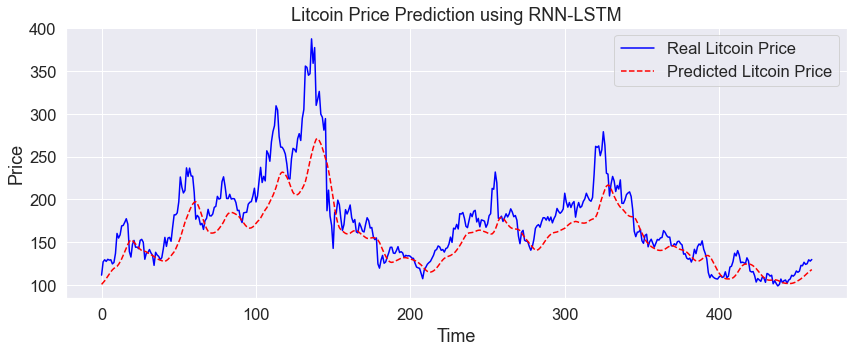

In [27]:
plt.figure(figsize=(14,5))
plt.plot(y_test_transformed, color = 'blue', label = 'Real Litcoin Price')
plt.plot(pred_transformed, color = 'red',linestyle='dashed', label = 'Predicted Litcoin Price')
plt.title('Litcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
#Mean absolute percentage error
mape=np.mean(np.abs(np.array(pred_transformed)- np.array(y_test_transformed))/np.abs(y_test_transformed))
print('MAPE:' +str(mape))

MAPE:0.1072867004077528


# **ARIMA Algorithm**

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,5.085890,5.170770,4.965950,5.058550,5.058550,3071840
2014-09-18,5.065430,5.065430,4.579960,4.685230,4.685230,4569260
2014-09-19,4.687290,4.755820,4.254350,4.327770,4.327770,3917450
2014-09-20,4.329200,4.616080,4.202190,4.286440,4.286440,5490660
2014-09-21,4.263070,4.300130,4.154990,4.245920,4.245920,2931220
...,...,...,...,...,...,...
2022-03-26,124.071068,125.360939,122.287392,124.881332,124.881332,560151992
2022-03-27,124.889275,129.397476,123.675545,129.397476,129.397476,740569100
2022-03-28,129.400635,132.412476,127.852745,127.938614,127.938614,943699101


In [31]:
#Train test split
to_row=int(len(df)*0.8)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])

In [32]:
model_predictions=[]
n_test_observatio=len(testing_data)

In [ ]:
#Training ARIMA model
for i in range(n_test_observatio):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)

C:\Users\rmano\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
model_fit.summary()

In [ ]:
plt.figure(figsize=(16,8))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range,testing_data,color='red',label='LTC Actual Price')
plt.plot(date_range,model_predictions,color='blue',linestyle='dashed',label='LTC predicted Price')
plt.title('Litcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Mean absolute percentage error
mape=np.mean(np.abs(np.array(model_predictions)- np.array(testing_data))/np.abs(testing_data))
print('MAPE:' +str(mape))

In [ ]:
#Mean absolute percentage error
mape=np.mean(np.abs(np.array(pred_transformed)- np.array(y_test_transformed))/np.abs(y_test_transformed))
print('MAPE:' +str(mape))